# Representative-based / Prototype-based Clustering

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-Means-clustering" data-toc-modified-id="K-Means-clustering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-Means clustering</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Fit-K-means-model" data-toc-modified-id="Fit-K-means-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fit K-means model</a></span></li><li><span><a href="#Visualize-the-clustering" data-toc-modified-id="Visualize-the-clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualize the clustering</a></span></li><li><span><a href="#Elbow-method" data-toc-modified-id="Elbow-method-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Elbow method</a></span></li><li><span><a href="#Silhouette-coefficients-and-plot" data-toc-modified-id="Silhouette-coefficients-and-plot-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Silhouette coefficients and plot</a></span></li></ul></li><li><span><a href="#In-class-assignment-:-K-means-Clustering" data-toc-modified-id="In-class-assignment-:-K-means-Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font color="orange">In-class assignment : K-means Clustering<font></font></font></a></span></li><li><span><a href="#Kernel-K-Means-clustering" data-toc-modified-id="Kernel-K-Means-clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kernel K-Means clustering</a></span><ul class="toc-item"><li><span><a href="#Kernel-K-means-function" data-toc-modified-id="Kernel-K-means-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Kernel K-means function</a></span></li><li><span><a href="#Generate-data" data-toc-modified-id="Generate-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate data</a></span></li><li><span><a href="#Your-Turn:-Apply-RBF-Kernel-K-mean-to-the-data-and-visualize-the-clustering" data-toc-modified-id="Your-Turn:-Apply-RBF-Kernel-K-mean-to-the-data-and-visualize-the-clustering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><font color="orange">Your Turn: Apply RBF Kernel K-mean to the data and visualize the clustering</font></a></span></li></ul></li></ul></div>

**Load necessary packages and apply custom configurations**

In [ ]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm

#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)

Numpy version 1.21.6
Pandas version 1.3.5
Seaborn version 0.11.2
Statsmodels version 0.10.2


## K-Means clustering

### Load the data

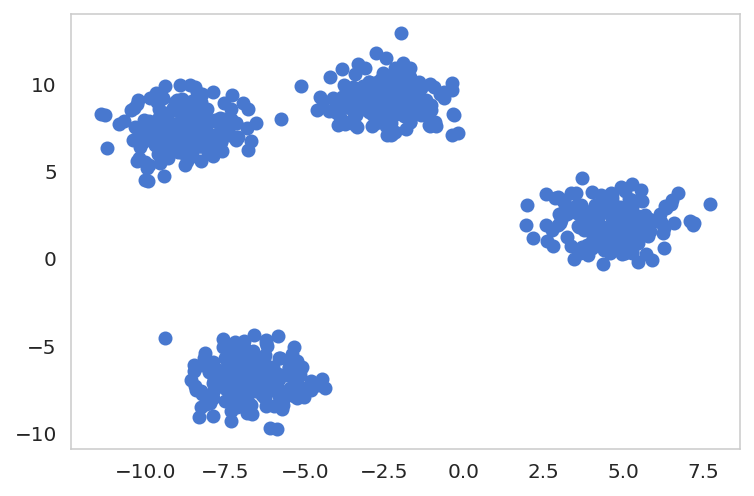

In [ ]:
#from sklearn.datasets import load_iris
#data = load_iris()
#X=np.hstack((data.data, data.target.reshape(-1,1)))

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, _ = make_blobs(n_samples=800, centers=4, random_state=42)
plt.scatter(X[:, 0], X[:, 1]);

### Fit K-means model

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
K = 5

# Fit the input data
kmeans = KMeans(n_clusters=K).fit(X)

# Get the cluster labels
labels = kmeans.predict(X) # or use kmeans.labels

# Get sum of squares distance of all points
sse = kmeans.inertia_

# Centroid values
centroids = kmeans.cluster_centers_

np.set_printoptions(precision=3)
print("Sum of squared errors : {:.3f}".format(sse))
print("\nCentroids : \n", centroids)

Sum of squared errors : 1416.139

Centroids : 
 [[ 4.592  1.95 ]
 [-8.26   8.157]
 [-6.682 -6.81 ]
 [-2.501  9.053]
 [-9.287  6.735]]


### Visualize the clustering 

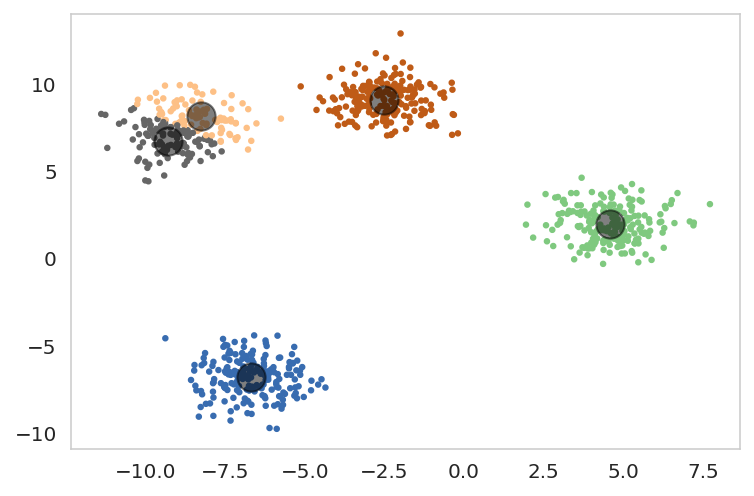

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Elbow method

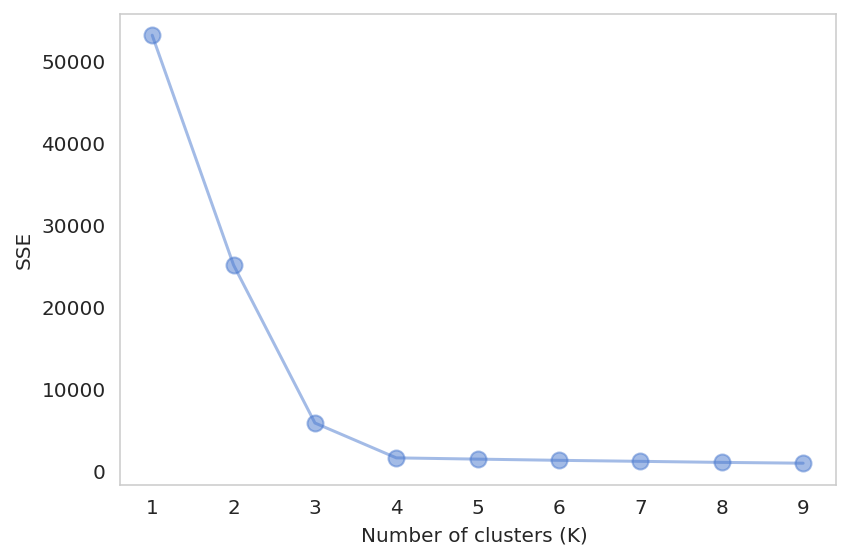

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8)
plt.xlabel("Number of clusters (K) ")
plt.ylabel("SSE")
plt.tight_layout();


### Silhouette coefficients and plot

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(X).predict(X)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(X, labels)))

K = 2, Silhouette score = 0.5885
K = 3, Silhouette score = 0.7518
K = 4, Silhouette score = 0.7894
K = 5, Silhouette score = 0.6846
K = 6, Silhouette score = 0.5524
K = 7, Silhouette score = 0.4195
K = 8, Silhouette score = 0.3346
K = 9, Silhouette score = 0.3387


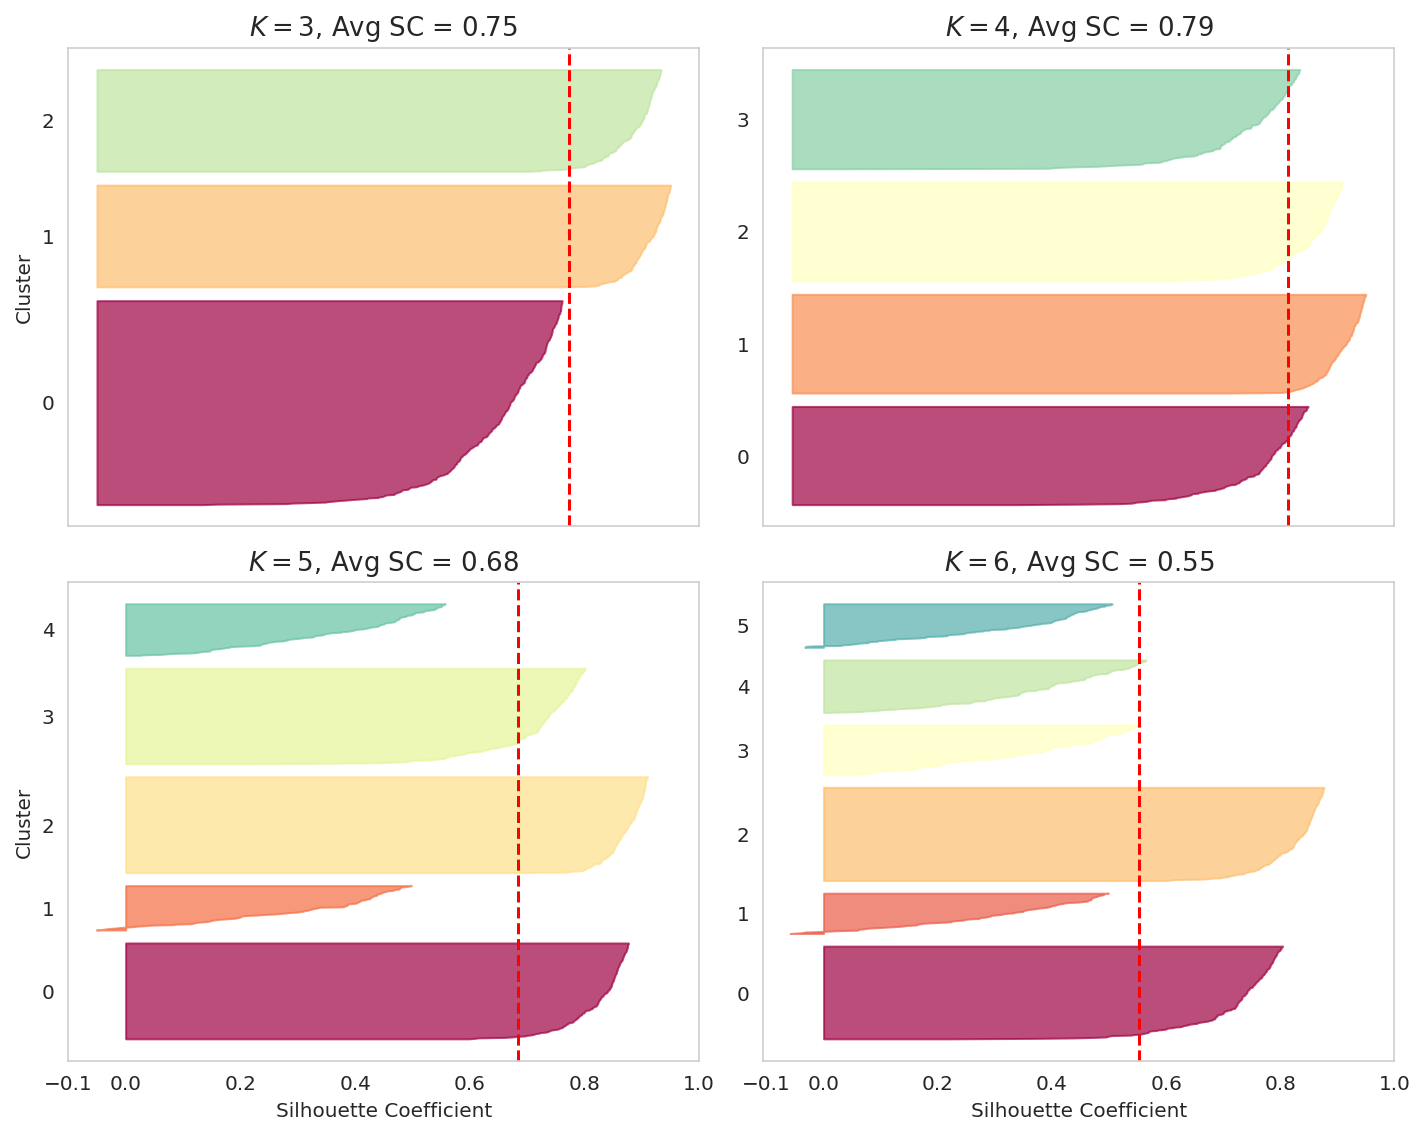

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import KMeans


plt.figure(figsize=(10, 8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    kmeans_labels = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, kmeans_labels)

    padding = len(X) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[kmeans_labels == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    avg_sc = silhouette_scores[k - 2]
    plt.axvline(avg_sc, color="red", linestyle="--")
    plt.title("$K={}$, Avg SC = {:.2f}".format(k, avg_sc), fontsize=13)

#save_fig("silhouette_analysis_plot")
plt.tight_layout();

## <font color='orange'>In-class assignment : K-means Clustering<font>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data1 = pd.read_excel('/content//gdrive/MyDrive/L11-clustering-basics.xlsx',sheet_name='Dataset1')
data2 = pd.read_excel('/content//gdrive/MyDrive/L11-clustering-basics.xlsx',sheet_name='Dataset2')
data3 = pd.read_excel('/content//gdrive/MyDrive/L11-clustering-basics.xlsx',sheet_name='Dataset3')
data4 = pd.read_excel('/content//gdrive/MyDrive/L11-clustering-basics.xlsx',sheet_name='Dataset4')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Dataset 1 

In [ ]:
### Silhouette coefficients 
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(data1).predict(data1)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(data1, labels)))
    

K = 2, Silhouette score = 0.5079
K = 3, Silhouette score = 0.6254
K = 4, Silhouette score = 0.6468
K = 5, Silhouette score = 0.5268
K = 6, Silhouette score = 0.4260
K = 7, Silhouette score = 0.3315
K = 8, Silhouette score = 0.3464
K = 9, Silhouette score = 0.3529


the maximun is K = 4, Silhouette score = 0.6468


Sum of squared errors : 184.324

Centroids : 
 [[ 1.071 -0.979]
 [ 9.972  4.067]
 [-1.036 -1.004]
 [ 1.004  1.011]]


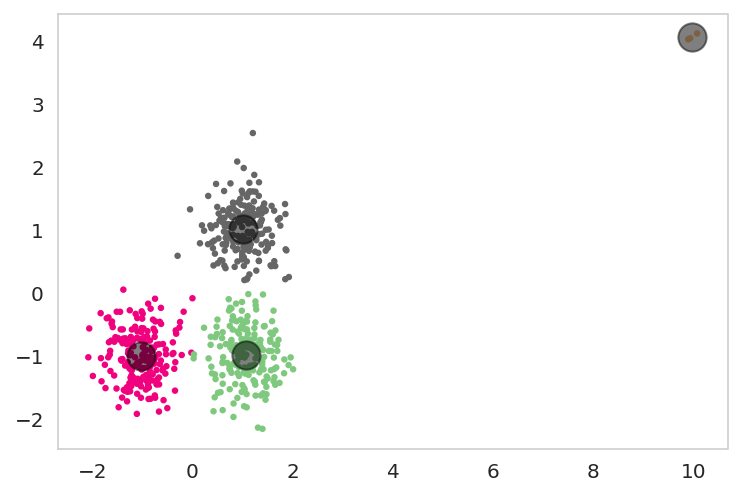

In [ ]:
# Number of clusters
K = 4

# Fit the input data
kmeans = KMeans(n_clusters=K).fit(data1)

# Get the cluster labels
labels = kmeans.predict(data1) # or use kmeans.labels

# Get sum of squares distance of all points
sse = kmeans.inertia_

# Centroid values
centroids = kmeans.cluster_centers_

np.set_printoptions(precision=3)
print("Sum of squared errors : {:.3f}".format(sse))
print("\nCentroids : \n", centroids)
plt.scatter(data1['X1'], data1['X2'], c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Dataset 2

In [ ]:
### Silhouette coefficients 
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(data2).predict(data2)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(data2, labels)))
    

K = 2, Silhouette score = 0.2653
K = 3, Silhouette score = 0.2811
K = 4, Silhouette score = 0.4736
K = 5, Silhouette score = 0.5201
K = 6, Silhouette score = 0.5376
K = 7, Silhouette score = 0.5345
K = 8, Silhouette score = 0.4227
K = 9, Silhouette score = 0.4210


the maximun is K = 6, Silhouette score = 0.5376

Sum of squared errors : 94.916

Centroids : 
 [[-1.173e-03  6.132e-04]
 [ 6.181e-01  7.173e-01]
 [ 8.701e-01 -3.722e-01]
 [-9.833e-02 -9.242e-01]
 [-4.669e-01  8.151e-01]
 [-9.147e-01 -1.717e-01]]


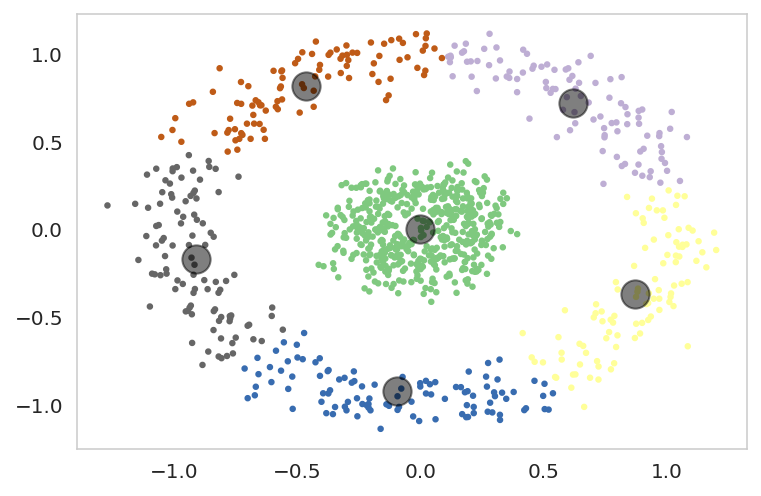

In [ ]:
# Number of clusters
K = 6

# Fit the input data
kmeans = KMeans(n_clusters=K).fit(data2)

# Get the cluster labels
labels = kmeans.predict(data2) # or use kmeans.labels

# Get sum of squares distance of all points
sse = kmeans.inertia_

# Centroid values
centroids = kmeans.cluster_centers_

np.set_printoptions(precision=3)
print("Sum of squared errors : {:.3f}".format(sse))
print("\nCentroids : \n", centroids)
plt.scatter(data2['X1'], data2['X2'], c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Dataset 3

In [ ]:
### Silhouette coefficients 
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(data3).predict(data3)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(data3, labels)))
    

K = 2, Silhouette score = 0.4890
K = 3, Silhouette score = 0.4279
K = 4, Silhouette score = 0.4600
K = 5, Silhouette score = 0.4892
K = 6, Silhouette score = 0.5284
K = 7, Silhouette score = 0.5328
K = 8, Silhouette score = 0.5318
K = 9, Silhouette score = 0.5320


the maximun is K = 7, Silhouette score = 0.5328

Sum of squared errors : 35.211

Centroids : 
 [[-0.819  0.492]
 [ 0.838  0.463]
 [ 0.037  0.954]
 [ 0.099  0.147]
 [ 1.346 -0.413]
 [ 1.903  0.126]
 [ 0.583 -0.398]]


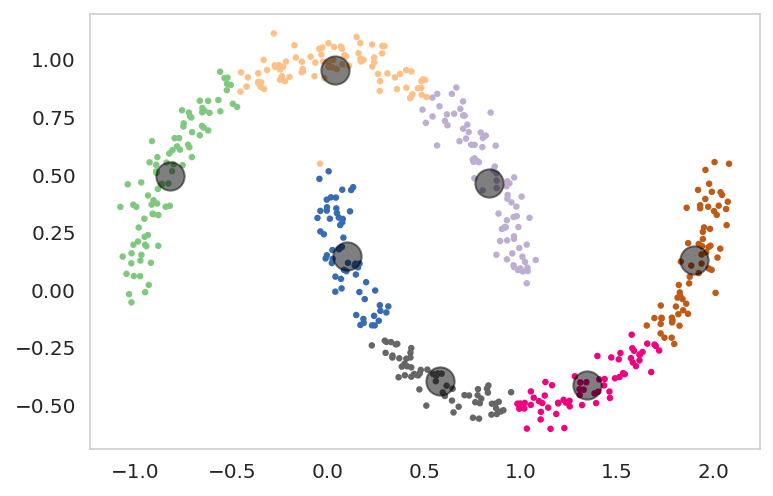

In [ ]:
# Number of clusters
K = 7

# Fit the input data
kmeans = KMeans(n_clusters=K).fit(data3)

# Get the cluster labels
labels = kmeans.predict(data3) # or use kmeans.labels

# Get sum of squares distance of all points
sse = kmeans.inertia_

# Centroid values
centroids = kmeans.cluster_centers_

np.set_printoptions(precision=3)
print("Sum of squared errors : {:.3f}".format(sse))
print("\nCentroids : \n", centroids)
plt.scatter(data3['X1'], data3['X2'], c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Dataset 4

In [ ]:
### Silhouette coefficients 
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(data4).predict(data4)
    
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(data4, labels)))

K = 2, Silhouette score = 0.4271
K = 3, Silhouette score = 0.4889
K = 4, Silhouette score = 0.4679
K = 5, Silhouette score = 0.4536
K = 6, Silhouette score = 0.4562
K = 7, Silhouette score = 0.4585
K = 8, Silhouette score = 0.4499
K = 9, Silhouette score = 0.4311


the maximun is K = 3, Silhouette score = 0.4889

Sum of squared errors : 806.607

Centroids : 
 [[ 0.728 -2.026]
 [-1.218 -1.3  ]
 [ 0.924  0.119]]


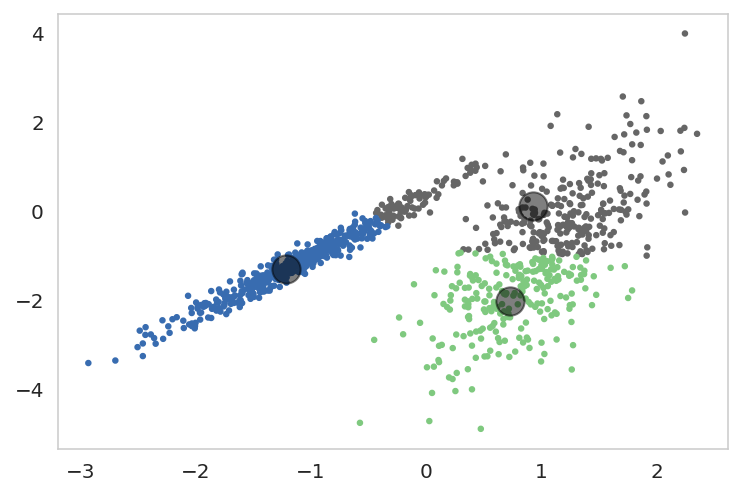

In [54]:
# Number of clusters
K = 3

# Fit the input data
kmeans = KMeans(n_clusters=K).fit(data4)

# Get the cluster labels
labels = kmeans.predict(data4) # or use kmeans.labels

# Get sum of squares distance of all points
sse = kmeans.inertia_

# Centroid values
centroids = kmeans.cluster_centers_

np.set_printoptions(precision=3)
print("Sum of squared errors : {:.3f}".format(sse))
print("\nCentroids : \n", centroids)
plt.scatter(data4['X1'], data4['X2'], c=labels, s=5, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Kernel K-Means clustering

### Kernel K-means function
Code from https://gist.github.com/mblondel/6230787

In [ ]:
"""Kernel K-means"""

# Author: Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause

import numpy as np

from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import check_random_state


class KernelKMeans(BaseEstimator, ClusterMixin):
    """
    Kernel K-means
    
    Reference
    ---------
    Kernel k-means, Spectral Clustering and Normalized Cuts.
    Inderjit S. Dhillon, Yuqiang Guan, Brian Kulis.
    KDD 2004.
    """

    def __init__(self, n_clusters=3, max_iter=50, tol=1e-3, random_state=None,
                 kernel="linear", gamma=None, degree=3, coef0=1,
                 kernel_params=None, verbose=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.verbose = verbose
        
    @property
    def _pairwise(self):
        return self.kernel == "precomputed"

    def _get_kernel(self, X, Y=None):
        if callable(self.kernel):
            params = self.kernel_params or {}
        else:
            params = {"gamma": self.gamma,
                      "degree": self.degree,
                      "coef0": self.coef0}
        return pairwise_kernels(X, Y, metric=self.kernel,
                                filter_params=True, **params)

    def fit(self, X, y=None, sample_weight=None):
        n_samples = X.shape[0]

        K = self._get_kernel(X)

        sw = sample_weight if sample_weight else np.ones(n_samples)
        self.sample_weight_ = sw

        rs = check_random_state(self.random_state)
        self.labels_ = rs.randint(self.n_clusters, size=n_samples)

        dist = np.zeros((n_samples, self.n_clusters))
        self.within_distances_ = np.zeros(self.n_clusters)

        for it in range(self.max_iter):
            dist.fill(0)
            self._compute_dist(K, dist, self.within_distances_,
                               update_within=True)
            labels_old = self.labels_
            self.labels_ = dist.argmin(axis=1)

            # Compute the number of samples whose cluster did not change 
            # since last iteration.
            n_same = np.sum((self.labels_ - labels_old) == 0)
            if 1 - float(n_same) / n_samples < self.tol:
                if self.verbose:
                    print("Converged at iteration ", it + 1)
                break

        self.X_fit_ = X

        return self

    def _compute_dist(self, K, dist, within_distances, update_within):
        """Compute a n_samples x n_clusters distance matrix using the 
        kernel trick."""
        sw = self.sample_weight_

        for j in range(self.n_clusters):
            mask = self.labels_ == j

            if np.sum(mask) == 0:
                raise ValueError("Empty cluster found, try smaller n_cluster.")

            denom = sw[mask].sum()
            denomsq = denom * denom

            if update_within:
                KK = K[mask][:, mask]  # K[mask, mask] does not work.
                dist_j = np.sum(np.outer(sw[mask], sw[mask]) * KK / denomsq)
                within_distances[j] = dist_j
                dist[:, j] += dist_j
            else:
                dist[:, j] += within_distances[j]

            dist[:, j] -= 2 * np.sum(sw[mask] * K[:, mask], axis=1) / denom

    def predict(self, X):
        K = self._get_kernel(X, self.X_fit_)
        n_samples = X.shape[0]
        dist = np.zeros((n_samples, self.n_clusters))
        self._compute_dist(K, dist, self.within_distances_,
                           update_within=False)
        return dist.argmin(axis=1)

### Generate data

In [ ]:
from sklearn.datasets import make_circles

# define dataset
X, _ = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)


### <font color='orange'>Your Turn: Apply RBF Kernel K-mean to the data and visualize the clustering</font>